# Neural network

In [ ]:
# load library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

In [39]:
# load the dataset
df = pd.read_csv("categories.csv")
del df['University-name']
del df['State']
data = np.array(df)
np.random.shuffle(data)
# 80/20 train/test split
num_train = int(.8 *len(data))  
X_train, y_train = data[:num_train, :-1], data[:num_train, -1]
X_test, y_test = data[num_train:, :-1], data[num_train:, -1]

In [40]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
look_up_fruit_name = dict(zip(df.cat_label.unique(), df.categories.unique()))
look_up_fruit_name

{'business_and_comptability litterature sciences ': 1,
 'arts_and_history business_and_comptability communication_and_social ': 2,
 'arts_and_history sciences ': 3,
 'engineering ': 4,
 'arts_and_history business_and_comptability sciences engineering ': 5,
 'arts_and_history litterature sciences ': 6,
 'arts_and_history ': 7,
 'architectures arts_and_history engineering ': 8,
 'architectures arts_and_history business_and_comptability sciences engineering ': 9,
 'sciences engineering ': 10,
 'architectures engineering ': 11,
 'arts_and_history sciences communication_and_social engineering ': 12,
 'business_and_comptability ': 13,
 'communication_and_social ': 14,
 'architectures arts_and_history sciences engineering ': 15,
 'arts_and_history business_and_comptability sciences communication_and_social engineering ': 16,
 'architectures business_and_comptability engineering ': 17,
 'arts_and_history business_and_comptability litterature sciences engineering ': 18,
 'business_and_comptabil

In [41]:
# features names of datasets
df.keys()

Index(['location', 'Control', 'number-of-students', 'male:female (ratio)',
       'student:faculty (ratio)', 'sat-verbal', 'sat-math', 'expenses',
       'percent-financial-aid', 'number-of-applicants', 'percent-admittance',
       'percent-enrolled', 'academics', 'social', 'quality-of-life',
       'categories', 'cat_label'],
      dtype='object')

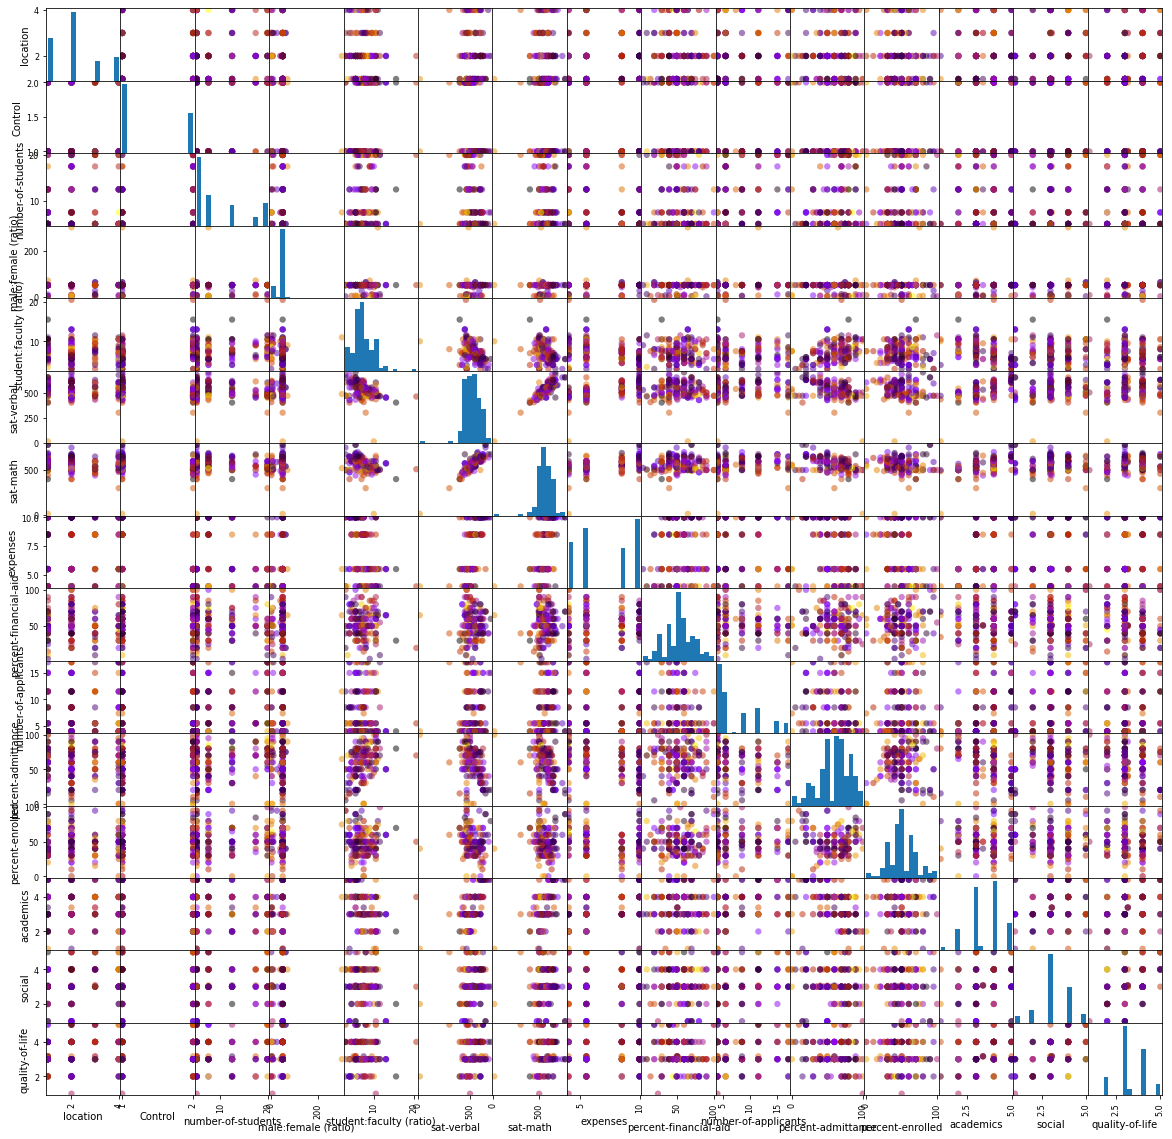

In [42]:
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
# Split the data into training and testing
X = df[['location', 'Control', 'number-of-students', 'male:female (ratio)','student:faculty (ratio)', 'sat-verbal', 'sat-math', 'expenses','percent-financial-aid', 'number-of-applicants', 'percent-admittance','percent-enrolled', 'academics', 'social', 'quality-of-life']]
y = df['categories']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# plotting a scatter matrix
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(20,20), cmap = cmap)

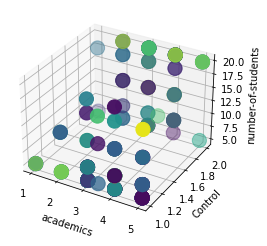

In [43]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['academics'], df['Control'], df['number-of-students'], c = df['categories'], marker = 'o', s=200)
ax.set_xlabel('academics')
ax.set_ylabel('Control')
ax.set_zlabel('number-of-students')
plt.show()


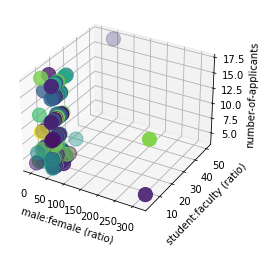

In [44]:
# plotting a 3D scatter plot

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['male:female (ratio)'], df['student:faculty (ratio)'], df['number-of-applicants'], c = df['categories'], marker = 'o', s=200)
ax.set_xlabel('male:female (ratio)')
ax.set_ylabel('student:faculty (ratio)')
ax.set_zlabel('number-of-applicants')
plt.show()

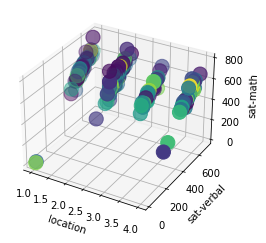

In [45]:
# plotting a 3D scatter plot

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['location'], df['sat-verbal'], df['sat-math'], c = df['categories'], marker = 'o', s=200)
ax.set_xlabel('location')
ax.set_ylabel('sat-verbal')
ax.set_zlabel('sat-math')
plt.show()

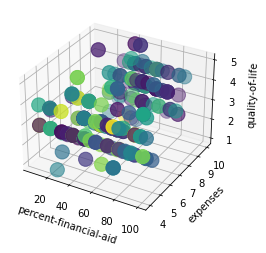

In [46]:
# plotting a 3D scatter plot

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['percent-financial-aid'], df['expenses'], df['quality-of-life'], c = df['categories'], marker = 'o', s=200)
ax.set_xlabel('percent-financial-aid')
ax.set_ylabel('expenses')
ax.set_zlabel('quality-of-life')
plt.show()

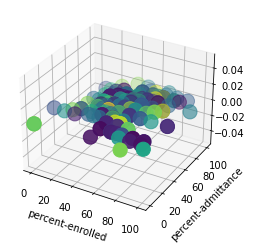

In [47]:
# plotting a 3D scatter plot

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['percent-enrolled'], df['percent-admittance'], c = df['categories'], marker = 'o', s=200)
ax.set_xlabel('percent-enrolled')
ax.set_ylabel('percent-admittance')
plt.show()

In [48]:
# Create classifier object
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 71)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.11666666666666667

In [49]:
categories = df['categories']
data = df[['location', 'Control', 'number-of-students', 'male:female (ratio)','student:faculty (ratio)', 'sat-verbal', 'sat-math', 'expenses','percent-financial-aid', 'number-of-applicants', 'percent-admittance','percent-enrolled', 'academics', 'social', 'quality-of-life','categories', 'cat_label']]
df['categories'] = categories
df.corr()['categories'].sort_values(ascending=False)

categories                 1.000000
number-of-students         0.202849
Control                    0.147388
location                   0.146668
social                     0.125958
number-of-applicants       0.046471
percent-admittance         0.034144
quality-of-life            0.030592
student:faculty (ratio)    0.010869
percent-financial-aid     -0.015813
percent-enrolled          -0.078398
male:female (ratio)       -0.080569
academics                 -0.080967
sat-verbal                -0.161883
sat-math                  -0.184351
expenses                  -0.294657
Name: categories, dtype: float64

<AxesSubplot:>

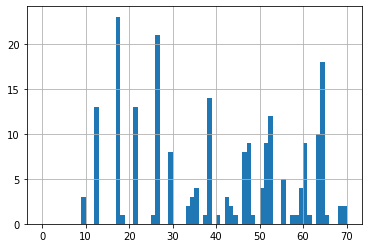

In [50]:
# plot the hitogramme 
lens = df.cat_label.str.len()
lens.hist(bins = np.arange(0,71,1))

In [51]:
print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))

# print("X_train shape:",X_train.shape)

print("X_test shape: {}".format(X_test.shape)) 
print("y_test shape: {}".format(y_test.shape))

X_train shape: (178, 15)
y_train shape: (178,)
X_test shape: (60, 15)
y_test shape: (60,)


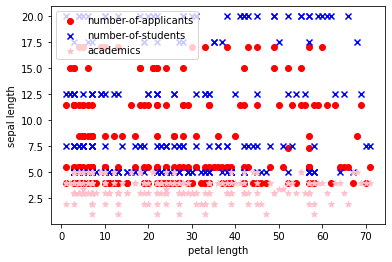

In [52]:
# scatter for  categories
import matplotlib.pyplot as plt

plt.scatter( df['categories'],df['number-of-applicants'], color='red', marker='o', label='number-of-applicants')
plt.scatter( df['categories'],df['number-of-students'], color='blue', marker='x', label='number-of-students')
plt.scatter( df['categories'],df['academics'], color='pink', marker='*', label='academics')


plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [53]:
#### ____ NEURAL NETWORK _____
#create classifier

from sklearn.neural_network import MLPClassifier # neural network

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)


clf.fit(X_train, y_train)

#calcul of predection
prediction = clf.predict(X_test)

print("Predection =", prediction)

print("Class y =",  y_test)


Predection = [ 7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7 58  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7]
Class y = 178    34
153    34
106    13
111     7
125    13
225    69
122    23
214    68
45     27
194     5
118     3
176    28
217     7
101    45
173    63
154    27
180    42
108    22
184    38
8       8
55      7
90     13
89     33
5       5
22     16
37     24
156    24
12      4
109    26
135    10
219     3
116    30
205     3
204    23
44      7
188    49
169    39
208    22
74      7
97      7
71     13
18     13
150    57
15     12
63     33
7       7
198    10
171    58
139    43
152    27
209    55
92     18
83     42
33     23
75     39
157    22
161     6
196     3
64     34
213    67
Name: categories, dtype: int64


In [54]:
from sklearn import metrics
#print the accuracy of the Multi-layer Perceptron
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,y_test))


The accuracy of the Multi-layer Perceptron is: 0.11666666666666667


In [55]:
### Architecture 2

NNtest = MLPClassifier(solver='lbfgs', alpha=2, hidden_layer_sizes=(1), random_state=1)


NNtest.fit(X_train, y_train)

pred = NNtest.predict(X_test)
print("predection =", pred)
print("y test =", y_test)



predection = [ 5  5  5  5  5  4  7  5  7  7  5  5  5  5  4  5  5  4  7  4 58  5  5  7
  4  5  5  4  4  5  5  5  5  5  4  5  5  5  7  5  5  5  4  7  5  7  4  5
  7  5  7  5  5  5  5  5  5  7  5  5]
y test = 178    34
153    34
106    13
111     7
125    13
225    69
122    23
214    68
45     27
194     5
118     3
176    28
217     7
101    45
173    63
154    27
180    42
108    22
184    38
8       8
55      7
90     13
89     33
5       5
22     16
37     24
156    24
12      4
109    26
135    10
219     3
116    30
205     3
204    23
44      7
188    49
169    39
208    22
74      7
97      7
71     13
18     13
150    57
15     12
63     33
7       7
198    10
171    58
139    43
152    27
209    55
92     18
83     42
33     23
75     39
157    22
161     6
196     3
64     34
213    67
Name: categories, dtype: int64


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [56]:
#accuracy score for seconde architecture
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(pred,y_test))


The accuracy of the Multi-layer Perceptron is: 0.05


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]




Text(0.5, 15.0, 'Predicted label')

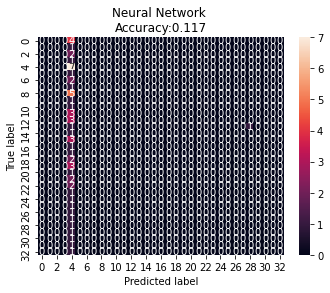

In [57]:
### Test 
### Confusion Matrix for Multiclass Classification 
import seaborn as sns
from sklearn.metrics import  confusion_matrix

prediction = clf.predict(X_test)
print(confusion_matrix(y_test,prediction))
print("\n")

### Design Predicted label and True label :

confusion_mc = confusion_matrix(y_test,prediction)

df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,33)], columns = [i for i in range(0,33)])

plt.figure(figsize=(5.5,4))

sns.heatmap(df_cm, annot=True)


plt.title('Neural Network \nAccuracy:{0:.3f}'.format(metrics.accuracy_score(y_test, prediction)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
# Decision boundry